# BISHAL GOSWAMI
# DATA SCIENCE INTERN @LetsGrowMore
# LGMVIP TASK 4
# Develop A Neural Network That Can Read Handwriting

In [13]:
import tensorflow as tf
from numpy import unique, argmax
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

## Loading  and Reading the data

In [14]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [15]:
x_train =x_train.reshape((x_train.shape[0] ,x_train.shape[1], x_train.shape[2],1))
x_test =x_test.reshape((x_test.shape[0] ,x_test.shape[1], x_test.shape[2],1))

In [16]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

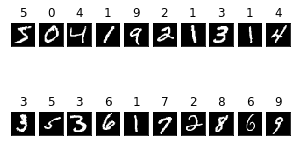

In [17]:
fig=plt.figure(figsize=(5,3))
for i in range(20):
  ax =fig.add_subplot(2,10,i+1 ,xticks=[] ,yticks=[])
  ax.imshow(np.squeeze(x_train[i]), cmap='gray')
  ax.set_title(y_train[i])

In [18]:
img_shape= x_train.shape[1:]
img_shape

(28, 28, 1)

# BUILDING NEURAL NETWORK MODEL THAT CAN READ HANDWRITING

In [19]:
import tensorflow as tf


model = tf.keras.models.Sequential([

  tf.keras.layers.Flatten(input_shape=(28, 28)),

  tf.keras.layers.Dense(128, activation='relu'),

  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Dense(10)

])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [21]:
from tensorflow.keras.utils import plot_model

plot_model(model, 'model.jpg', show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [22]:
predictions = model(x_train[:1]).numpy()

predictions

array([[-0.26553681, -0.6511519 ,  0.7514415 , -0.13754475, -0.62064713,
        -0.08484596,  0.68131053,  0.00172887, -0.5732052 ,  0.20689158]],
      dtype=float32)

In [23]:
tf.nn.softmax(predictions).numpy()

array([[0.07297382, 0.04962454, 0.20176001, 0.08293795, 0.05116165,
        0.0874259 , 0.18809515, 0.09533208, 0.05364736, 0.11704156]],
      dtype=float32)

In [24]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()
model.compile(optimizer='adam',loss=loss_fn, metrics=['accuracy'])

# MODEL FITTING

In [25]:
#model fitting
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2977 - accuracy: 0.9144
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1434 - accuracy: 0.9570
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1055 - accuracy: 0.9682
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0868 - accuracy: 0.9734
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0741 - accuracy: 0.9769


# Model Evaluation

In [26]:
model.evaluate(x_test,  y_test, verbose=5)

[0.07184769958257675, 0.9779999852180481]

# MODEL PROBABILITY

In [28]:
probability_model = tf.keras.Sequential([ model, tf.keras.layers.Softmax() ])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.02205559e-08, 6.80787871e-09, 2.86614340e-05, 4.46385602e-05,
        8.71176015e-13, 7.18014022e-08, 3.94373076e-12, 9.99925613e-01,
        2.21532886e-07, 7.38887479e-07],
       [5.84627060e-07, 1.77883296e-04, 9.99753416e-01, 2.15093723e-06,
        3.77388110e-14, 1.24832172e-06, 6.44727552e-05, 9.90195474e-14,
        3.89412918e-07, 3.27592472e-13],
       [1.53336487e-07, 9.99249637e-01, 2.55988707e-04, 8.04866431e-06,
        3.12188349e-05, 1.06387301e-06, 1.20996110e-05, 2.96292681e-04,
        1.44894962e-04, 5.79562936e-07],
       [9.99897599e-01, 1.01878983e-09, 1.15156045e-05, 6.76996459e-10,
        1.95567385e-08, 1.83763939e-06, 5.84097797e-05, 2.53710714e-05,
        4.83365459e-10, 5.22729488e-06],
       [2.13091221e-06, 7.42555795e-10, 2.67425435e-06, 2.35231035e-09,
        9.97065604e-01, 9.65009761e-08, 5.09175652e-06, 9.90084882e-05,
        1.93638562e-06, 2.82345666e-03]], dtype=float32)>

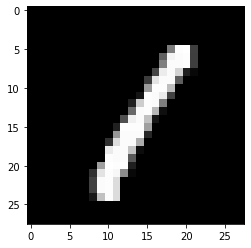

In [29]:
#Visualisation

img = x_train[3]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

# Conclusion


In [30]:
#prediction
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

predicted : 1


# THANK YOU